In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, json

%matplotlib inline


In [2]:
import pyusct
from pyusct.preprocess import get_truth, preprocess

## parameters

In [3]:
result_path = "/mnt/nas/2017-11-23_2/"
param_path = os.path.join(result_path, 'param.json')

In [4]:
with open(param_path, 'r') as f: param = json.load(f)
print(json.dumps(param, indent=4))

{
    "ringarray": {
        "num_points": 256, 
        "radius": 0.05
    }, 
    "source": {
        "point_map": [
            1, 
            17, 
            33, 
            49, 
            65, 
            81, 
            97, 
            113, 
            129, 
            145, 
            161, 
            177, 
            193, 
            209, 
            225, 
            241
        ], 
        "waveform": {
            "wavenum": 1, 
            "magnitude": 50, 
            "type": "sinusoidal", 
            "freq": 2000000.0, 
            "wavenum_offset": 2
        }
    }, 
    "grid": {
        "Nx": 1024, 
        "Ny": 1024, 
        "dx": 0.000125, 
        "dy": 0.000125
    }, 
    "io": {
        "save_movie": true
    }, 
    "sensor": {
        "freq": 40000000.0
    }, 
    "t_end": 0.0001
}


In [5]:
map_speed, map_dens = get_truth(result_path)

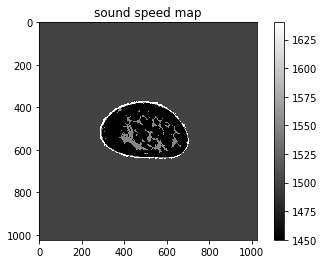

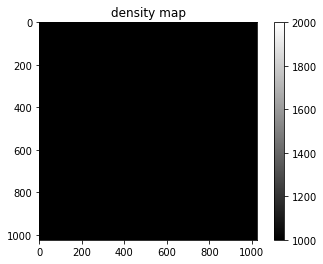

In [6]:
plt.imshow(map_speed, cmap='gray')
plt.colorbar()
plt.title("sound speed map")
plt.show()

plt.imshow(map_dens, cmap='gray')
plt.plot()
plt.colorbar()
plt.title("density map")
plt.show()

## sampling points (random)

In [39]:
points = []
points_i = []
for _ in range(2):
    ix = np.random.randint(300, 700)
    iy = np.random.randint(400, 600)
    x = ix * param["grid"]["dx"]
    y = iy * param["grid"]["dy"]
    points_i.append([iy, ix])
    points.append([y, x])
points

[[0.07100000000000001, 0.077375], [0.0575, 0.06325]]

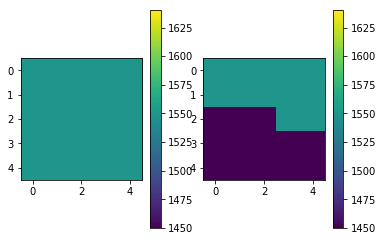

In [30]:
r = 2
for i in range(2):
    iy, ix = points_i[i]
    plt.subplot(1, 2, i+1)
    plt.imshow(
        map_speed[iy-r:iy+r+1, ix-r:ix+r+1],
        vmin=np.min(map_speed), vmax=np.max(map_speed))
    plt.colorbar()

In [31]:
rf, mat_pre = preprocess(result_path, points, offset_array = [0])

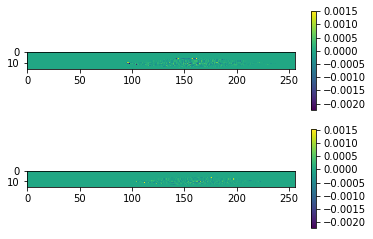

In [32]:
for j in range(mat_pre.shape[0]):
    plt.subplot(mat_pre.shape[0], 1, j+1)
    plt.imshow( mat_pre[j, 0, :,:], vmin = np.min(mat_pre), vmax = np.max(mat_pre))
    plt.colorbar()

In [33]:
for i in range( mat_pre.shape[0] ): # each sampling point
    print i, np.sum(mat_pre[i,:,:,:])

0 -0.0191443159945
1 0.00188030346658


## Synthetic aperture

In [34]:
points = []
out_image = np.zeros((param["grid"]["Ny"]/16, param["grid"]["Nx"]/16))

for iy in range(0, param["grid"]["Ny"], 16):
    print iy
    
    y = iy * param["grid"]["dy"]    
    for ix in range(0, param["grid"]["Nx"], 16):
        x = ix * param["grid"]["dx"]
        
        rf, mat_pre = preprocess(result_path, [[y, x]], offset_array = [0])
        out_image[iy/16, ix/16] = np.sum(mat_pre)

0
16
32
48
64
80
96
112
128
144
160
176
192
208
224
240
256
272
288
304
320
336
352
368
384
400
416
432
448
464
480
496
512
528
544
560
576
592
608
624
640
656
672
688
704
720
736
752
768
784
800
816
832
848
864
880
896
912
928
944
960
976
992
1008


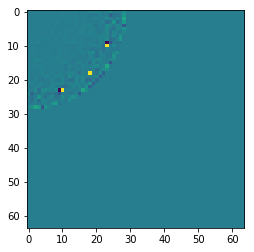

In [35]:
plt.imshow(out_image)

## Time series check

In [44]:
start = -50
end = 50
step = 1

In [45]:
points

[[0.07100000000000001, 0.077375], [0.0575, 0.06325]]

In [46]:
rf, mat_pre = preprocess(result_path, points, offset_array = np.arange(start, end, step))
mat_pre.shape

(2, 100, 16, 256)

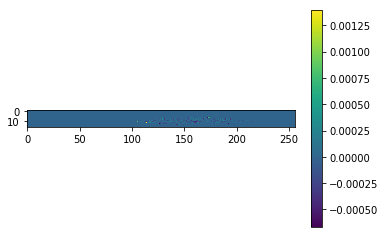

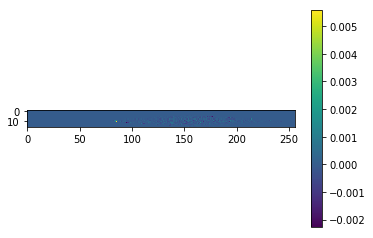

In [47]:
for img in mat_pre[:, int(-start/step),:,:]:
    plt.imshow(img)
    plt.colorbar()
    plt.show()

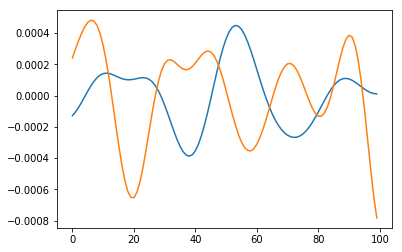

In [48]:
Tx = 10
Rx = 150
for ts in mat_pre[:, :, Tx, Rx]:
    plt.plot(ts)